In [7]:
pip install mlbgame


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: mlbgame in c:\users\ricky\anaconda3\lib\site-packages (2.5.0)



You should consider upgrading via the 'C:\Users\ricky\anaconda3\python.exe -m pip install --upgrade pip' command.


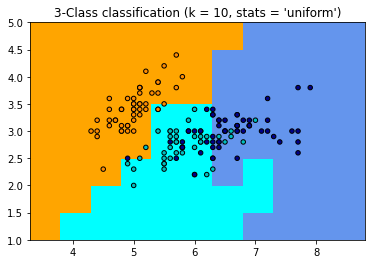

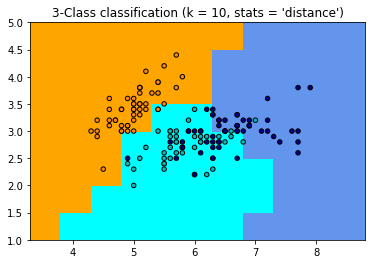

                  away_team             home_team  Delta (ERA)  Delta (RBI)  \
0             New York Mets    Kansas City Royals         0.64           -9   
1     Philadelphia Phillies       Cincinnati Reds         0.28          104   
2           Minnesota Twins     Baltimore Orioles        -0.86           20   
3      Washington Nationals        Atlanta Braves         1.00         -120   
4          Colorado Rockies  Arizona Diamondbacks         0.18          -96   
...                     ...                   ...          ...          ...   
2458      Toronto Blue Jays        Tampa Bay Rays         0.42          -81   
2459    St. Louis Cardinals    Pittsburgh Pirates         0.13          -49   
2460   San Francisco Giants     Milwaukee Brewers         0.43          -34   
2461         Detroit Tigers         Miami Marlins        -0.19          -93   
2462         Boston Red Sox     Cleveland Indians        -0.16         -103   

      Delta (SLG)  Delta (AVG)  home_team_win  
0  

KeyError: 0

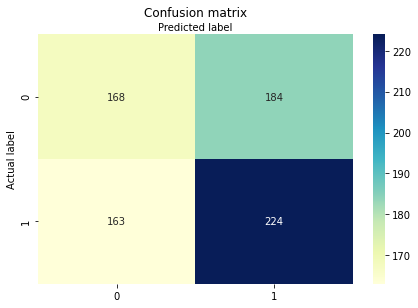

In [38]:
import pandas as pd 

from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #used for splitting data into training and testing 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics, datasets, neighbors
from sklearn.neighbors import KNeighborsClassifier


data = pd.read_csv("baseballData.csv")
print(data)




independent_cols = ['Delta (ERA)', 'Delta (RBI)', 'Delta (SLG)', 'Delta (AVG)']
X = data[independent_cols]
y = data.home_team_win


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)


model_name = "K-Nearest Neighbor Classifier"

knnClassifier = KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p =2)


prediction = knnClassifier.fit(X_train,y_train)

y_prediction_knn = prediction.predict(X_test)





cnf_matrix = metrics.confusion_matrix(y_test, y_prediction_knn)
print(cnf_matrix)
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap for data set 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



print("Accuracy:","{:.3%}".format(metrics.accuracy_score(y_test, y_prediction_knn)))
print("Precision:","{:.3%}".format(metrics.precision_score(y_test, y_prediction_knn)))
print("Recall:","{:.3%}".format(metrics.recall_score(y_test, y_prediction_knn)))




#Start doing KNN Stuff


datass = pd.read_csv("baseballData.csv")

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset

n_neighbors = 10

h = .5  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in [X_train, y_train]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[0].min() - 1, X[0].max() + 1
    y_min, y_max = X[1].min() - 1, X[1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, stats = '%s')"
              % (n_neighbors, weights))

plt.show()

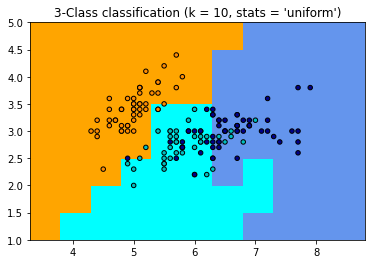

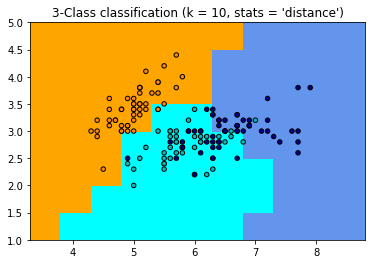

In [39]:

#previous test sets, ignore please
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 10

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .5  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, stats = '%s')"
              % (n_neighbors, weights))

plt.show()